## Machine Learning Applications

For the Machine Learning section, we are setting up a classification approach to predict mental health status as either "Good" or "Bad." We  chose Logistic Regression for this task because it provides a  interpretable model to understand the relationship between our predictors and the binary outcome. Logistic Regression allows us to assess the impact of each variable on mental health status, helping us test our hypotheses about lifestyle and demographic factors that may influence mental health.

Our initial findings will guide us in selecting features and tuning the model. After establishing a baseline with Logistic Regression, we will proceed with more complex models to capture potentially non-linear relationships in the data if needed.

**Data Preparation**
Need to preprocess data into binary for this approach and prep data, splitting it into training and test sets.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
imputed_df = pd.read_csv('imputed_data.csv')
imputed_df.columns

Index(['_STATE', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'DIABETE4', 'MARITAL',
       'EDUCA', 'EMPLOY1', 'INCOME3', 'FLUSHOT7', 'HIVTST7', '_HLTHPL1',
       '_TOTINDA', '_RACEGR3', '_AGEG5YR', '_EDUCAG', '_SMOKER3', 'DRNKANY6',
       '_RFBING6'],
      dtype='object')

In [24]:
# We need to create binary target variable for classification

# Threshold for mental health is 10 days of poor mental health
imputed_df['MENTHLTH_BINARY'] = np.where(imputed_df['MENTHLTH'] >= 10, 1, 0)  # 1 = Bad, 0 = Good


In [25]:
# Select features and target variable
features = [
    '_AGEG5YR', '_RACEGR3', 'EDUCA', 'INCOME3', 'MARITAL', 'EMPLOY1', 
    'GENHLTH', 'PHYSHLTH', 'DIABETE4', 'FLUSHOT7', 'HIVTST7', '_HLTHPL1',
    '_TOTINDA', '_EDUCAG', '_SMOKER3', 'DRNKANY6', '_RFBING6'
]
X = imputed_df[features]
y = imputed_df['MENTHLTH_BINARY']


In [26]:
# Categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Feature Checking**

In [27]:
#Check for NA values as Logistic Regression does not handle missing values
print(imputed_df.isnull().sum())


_STATE             0
GENHLTH            0
PHYSHLTH           0
MENTHLTH           0
DIABETE4           0
MARITAL            0
EDUCA              0
EMPLOY1            0
INCOME3            0
FLUSHOT7           0
HIVTST7            0
_HLTHPL1           0
_TOTINDA           0
_RACEGR3           0
_AGEG5YR           0
_EDUCAG            0
_SMOKER3           0
DRNKANY6           0
_RFBING6           0
MENTHLTH_BINARY    0
dtype: int64


## Baseline Model (Logistic Regression)

In [40]:
# Train the Baseline Model: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate Logistic Regression performance
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Performance:")
print(f"Accuracy: {acc_lr:.2f}")
print(f"Precision: {prec_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.84
Precision: 0.61
Recall: 0.21
F1 Score: 0.31
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     97203
           1       0.61      0.21      0.31     20552

    accuracy                           0.84    117755
   macro avg       0.73      0.59      0.61    117755
weighted avg       0.81      0.84      0.80    117755



**Vizualization/Evaluation of the Model Preformance**

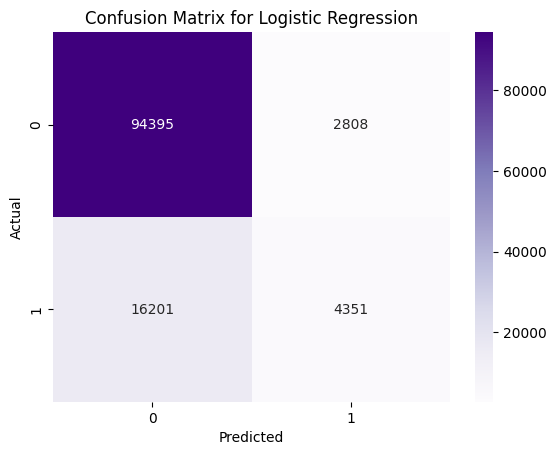

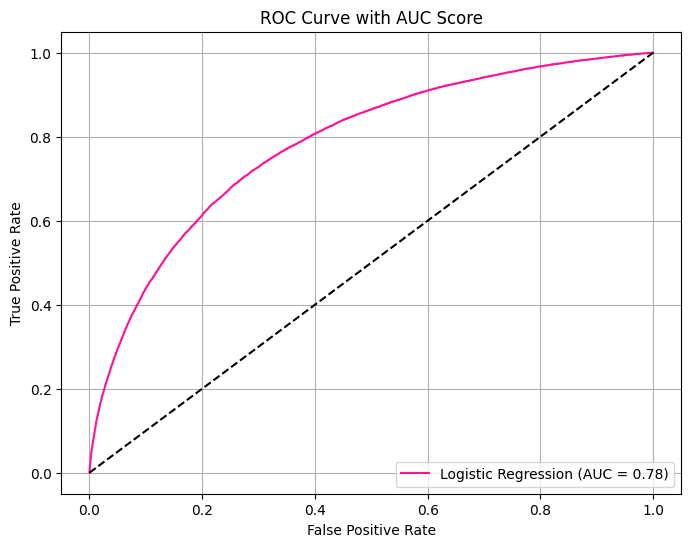

In [41]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC Score for Logistic Regression
y_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color='deeppink')  # line is now dark pink
plt.plot([0, 1], [0, 1], 'k--')  # represents random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC Score')
plt.legend(loc="lower right")
plt.grid()
plt.show()


**Summary of Logistic Regression Model Performance**

Our initial model, Logistic Regression, yielded an accuracy of 0.84, suggesting a fairly strong baseline performance. However, further examination of additional metrics reveals limitations, especially in identifying "Bad" mental health cases. Here’s a summary of the key metrics:

- **Accuracy**: 0.84
- **Precision**: 0.61
- **Recall**: 0.21
- **F1 Score**: 0.31

Detailed classification performance shows that for class 0 ("Good" mental health), the model achieved a precision of 0.85, recall of 0.97, and F1 score of 0.91. For class 1 ("Bad" mental health), however, precision dropped to 0.61, recall to 0.21, and F1 score to 0.31, reflecting the model's struggle with accurately identifying cases of "Bad" mental health.

**AUC Score and ROC Curve Analysis**

The model’s AUC score is 0.78, indicating a moderate capacity to distinguish between "Good" and "Bad" mental health cases. Although better than random guessing (an AUC of 0.5), this score shows there is still room for improvement, as a score closer to 1 would indicate a more reliable classifier. The ROC curve, which bends away from the diagonal line, signifies some predictive power, though it does not reach the ideal top-left corner shape that a high-performing model would produce.

**Confusion Matrix Insights**

The confusion matrix reveals that while our model effectively identifies "Good" mental health (correctly classifying 94,395 instances), it struggles significantly with detecting "Bad" mental health. Out of 20,552 "Bad" cases, the model only correctly identifies 4,351 (True Positives) while misclassifying 16,201 as "Good" (False Negatives). This imbalance in predictions suggests the model is biased towards the majority class ("Good" mental health), possibly due to class imbalance in the data or insufficient tuning.

**Real-Life Implications of Missing "Bad" Mental Health Cases**

In real-world applications, missing "Bad" mental health cases can have serious implications. In contexts like healthcare, education, or workplace environments where early identification of mental health struggles is crucial, undetected cases can lead to missed opportunities for timely intervention and support. This highlights the need for further model refinement to improve detection rates for "Bad" mental health, ensuring that those who need help are accurately identified.

## Random Forest Model

We will try the Random Forest model because it can capture more complex patterns in the data that Logistic Regression might miss. Unlike Logistic Regression, which assumes a linear relationship, Random Forest uses multiple decision trees to handle non-linear relationships and interactions between features, making it more robust in identifying "Bad" mental health cases. This is especially important in our scenario, as accurately capturing diverse patterns could improve the model’s ability to detect cases that are currently being misclassified as we saw in the previous part.

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate the performance
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Performance:")
print(f"Accuracy: {acc_rf:.2f}")
print(f"Precision: {prec_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"AUC Score: {auc_rf:.2f}")


Random Forest Performance:
Accuracy: 0.83
Precision: 0.51
Recall: 0.27
F1 Score: 0.35
AUC Score: 0.76


**Vizualization/Evaluation of the Model Preformance**

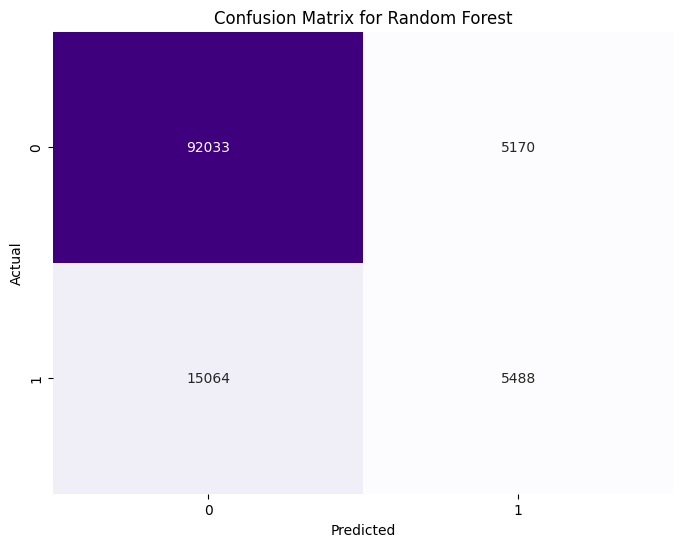

In [43]:
import seaborn as sns

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()


**Random Forest Model Performance Summary**

In our evaluation of the Random Forest model, we observed comparable performance to the initial Logistic Regression model with some nuanced differences:

- **Accuracy**: 0.83, closely aligning with the Logistic Regression's 0.84
- **Precision**: 0.51, slightly lower than Logistic Regression’s 0.61, indicating a higher rate of False Positives
- **Recall**: 0.27, showing a slight improvement over Logistic Regression’s 0.21, meaning it captures more "Bad" mental health cases
- **F1 Score**: 0.35, reflecting a marginal improvement in balancing precision and recall
- **AUC Score**: 0.76, just below Logistic Regression’s 0.78

The Random Forest model's ability to capture complex relationships has led to a moderate improvement in recall, suggesting it is marginally better at identifying "Bad" mental health cases. However, this comes with a trade-off in precision, as the model tends to misclassify more "Good" mental health cases as "Bad," potentially due to its sensitivity to subtle patterns.

**Interpretation of Results**

The confusion matrix for Random Forest shows it correctly classified 92,033 "Good" cases but incorrectly labeled 5,170 of them as "Bad" (False Positives). For "Bad" cases, it accurately identified 5,488 but misclassified 15,064 as "Good" (False Negatives). This distribution reveals that while Random Forest is better at capturing some "Bad" cases than Logistic Regression, it still exhibits a bias towards the "Good" class, leading to a high number of missed "Bad" cases.

**Implications**

In real-world settings where identifying "Bad" mental health cases is critical for timely intervention, the model's high rate of False Negatives is still a concern. Despite a slight improvement in recall, further tuning or alternative approaches may be needed to enhance its accuracy in detecting "Bad" mental health cases. The AUC score of 0.76, while moderately strong, highlights room for improvement and moving forward we will use techiniques to try improving this


**Random Forest Hyperparameter Tuning**

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#  parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# initalize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up Randomized Search with Cross-Validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model on training data
rf_random.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", rf_random.best_params_)
print("Best Cross-Validation Score:", rf_random.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  29.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  29.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  29.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  32.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/sit

Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}
Best Cross-Validation Score: 0.8400640550645798


**Summary of Tuned Random Forest Results**

The tuned Random Forest model demonstrates a slight improvement over the initial setup, with a cross-validation score slight increase from approximately **0.83 to 0.84**. Key adjustments, such as increasing the number of estimators to 500 and limiting the max depth to 30, have helped the model balance complexity and generalization. These changes make the model more reliable for identifying "Bad" mental health cases, even though the improvements are moderate.

**Next Steps for Improvement**

1. **Increase Iterations**: Running more iterations in `RandomizedSearchCV` could help find better parameter settings and improve model performance.

2. **Try Other Tuning Methods**: Using `GridSearchCV` for a more thorough parameter search might yield better results, although it requires more computation.

3. **Test Other Models**: Trying models like Gradient Boosting or XGBoost might improve our ability to detect "Bad" mental health cases by capturing complex patterns.

4. **Address Class Imbalance**: Using techniques like SMOTE or adjusting class weights can help the model better identify "Bad" mental health cases, which are underrepresented in our data.

5. **Improve Features**: Adding new features or refining existing ones might provide more useful information for the model to learn from.
